In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [54]:
dataset = pd.read_csv("C:/Users/Ananta Arora/Documents/Machine Learning A-Z/Polynomial Regression/Position_Salaries.csv")

In [53]:
# Importing the dataset
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2].values

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# # Splitting the dataset into the Training set and Test set

In [57]:
# Feature scaling
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
Y_train = sc_Y.fit_transform(Y_train.reshape(-1, 1))

c:\users\ananta arora\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
#fitting svr in the dataset
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)
# rbf specifies the kernel type in algorithm 


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

## Visualising the Svr results:

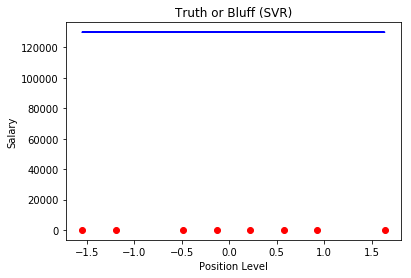

In [80]:
Y_pred =  regressor.predict(6.5)
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (SVR)' )
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

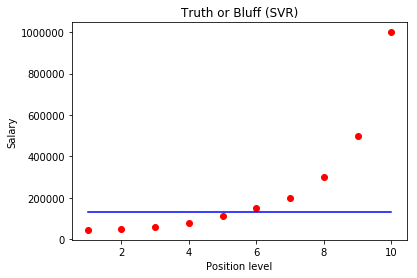

In [79]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()